In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.config.list_physical_devices('GPU'))


c:\Users\Clarissa Angelia\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8  # allocate 80% of GPU memory
session = tf.compat.v1.Session(config=config)

LOAD DATA

Split Training Dataset

Imbalance Dataset

In [3]:
path = 'D:/Semester 6/Deep Learning/train_data/train_10class/'
#       C:/Kuliah/Semester 6/Deep Learning/Data/train_100class/train_10class/410_sulphur-crested cockatoo
path_class = ['410_sulphur-crested cockatoo','413_bee eater','421_black swan', '442_great white shark', '450_goldfish',
        '460_mud turtle', '480_green snake', '500_tree frog', '603_scorpion', '607_black widow']
class_prob = [0.8, 0.3, 0.5, 0.9, 0.7, 0.6, 0.1, 0.5, 0.4, 0.2]
train_ds = None
# train_ds = tf.data.Dataset.from_tensor_slices([])
# print(train_ds.class_names)
for i, path_i in enumerate(path_class) :
    
    temp = tf.keras.utils.image_dataset_from_directory(

        directory=path+path_i,
        labels= None,
        label_mode='categorical',
        color_mode='rgb',
        batch_size=None,
        image_size=(224,224),
        shuffle=True,
        validation_split=class_prob[i],
        subset="training",
        seed=42
    )
    temp.class_names= path_i
    # print(temp.class_names)

    temp = tf.data.Dataset.sample_from_datasets([temp], weights=[class_prob[i]])
    # print(temp)
    # train_ds = tf.data.Dataset.from_tensor_slices(temp)

    if i == 0 :
        train_ds = temp
        temp_name = temp.class_names
        train_ds.class_names = []
        train_ds.class_names.append(temp_name)
        # train_ds.class_names = []
        print(train_ds.class_names)
    else:
        train_ds.concatenate(temp)
        train_ds.class_names.append(temp.class_names)
        
# print(train_ds.class_names)
train_ds_label = tf.data.Dataset.from_tensor_slices([train_ds.class_names])
# train_ds = tf.data.Dataset.from_tensor_slices(train_ds, (train_ds_label))
train_ds = tf.data.Dataset.zip((train_ds,train_ds_label))

Found 1300 files belonging to 1 classes.
Using 260 files for training.
['410_sulphur-crested cockatoo']
Found 1300 files belonging to 1 classes.
Using 910 files for training.
Found 1300 files belonging to 1 classes.
Using 650 files for training.
Found 1300 files belonging to 1 classes.
Using 130 files for training.
Found 1300 files belonging to 1 classes.
Using 391 files for training.
Found 1300 files belonging to 1 classes.
Using 520 files for training.


KeyboardInterrupt: 

In [3]:
path = 'D:/Semester 6/Deep Learning/train_data/imbalance_train_10class'

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=None,
    image_size=(224,224),
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=42

)

Found 7564 files belonging to 10 classes.
Using 6052 files for training.


In [ ]:
train_ds

Balance Dataset

In [4]:
path = 'D:/Semester 6/Deep Learning/train_data/train_10class'

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=None,
    image_size=(224,224),
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=42

)
# # labels='inferred',
# #                                                         label_mode='categorical',    
# #                                                         color_mode='rgb',
# #                                                         batch_size=None,
# #                                                         image_size=(224, 224),
# #                                                         shuffle=True,
# #                                                         seed=42,    
# #                                                         validation_split=0.2,
# #                                                         subset="training"

Found 13000 files belonging to 10 classes.
Using 10400 files for training.


Split Validation Dataset

In [4]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=None,
    image_size=(224,224),
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=42
)

Found 7564 files belonging to 10 classes.
Using 1512 files for validation.


In [ ]:
train_ds

In [6]:
totalClass = len(train_ds.class_names)

print(totalClass)

10


In [ ]:
train_ds.class_names

One Hot encoding label

In [7]:
# target_Classes = [410,413,421,442,450,460,480,500,603,607]
target_Classes = [i for i in range(totalClass)]
one_hot_encoding = tf.one_hot(target_Classes, depth=totalClass)
one_hot_encoding

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

print(train_ds)
# for image_batch in train_ds:
#       print(image_batch.shape)
#   break

(224, 224, 3)
(10,)
<ShuffleDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.float32, name=None))>


In [ ]:
# def preprocess_image(image, label) :
#   image = tf.image.resize(image, (224,224))
#   return image / 255. , label
  # return tf.cast(image,tf.float32) / 255.0, tf.one_hot(label, depth=totalClass)

In [9]:
def preprocess_image(image, label):
    image = tf.image.per_image_standardization(image-127)
    return image, label

In [10]:
mapped_train_data = train_ds.map(preprocess_image).batch(32)
mapped_validation_data = validation_ds.map(preprocess_image).batch(32)
mapped_train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [11]:
model_1 = tf.keras.models.Sequential([
    # convolutional layer pertama
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(strides=2,pool_size=2, padding="valid"),
    #layer 2
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(strides=2, pool_size=2, padding="valid"),
    #layer 3
    tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(strides=2, pool_size=2, padding="valid"),
    #layer 4
    tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.Conv2D(filters=512,kernel_size=(1,1),activation="relu"),
    tf.keras.layers.MaxPool2D(strides=2, pool_size=2, padding="valid"),
    #layer 5
    tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.Conv2D(filters=512,kernel_size=(1,1),activation="relu"),
    tf.keras.layers.MaxPool2D(strides=2, pool_size=2, padding="valid"),
    # flatten layer
    tf.keras.layers.Flatten(),
    # densing
    tf.keras.layers.Dense(4096,activation="relu"),
    tf.keras.layers.Dense(4096,activation="relu"),
    tf.keras.layers.Dense(totalClass,activation="softmax"),         #jangan lupa ganti sesuai jumlah class
])

In [12]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # How many epochs

    # Plot accuracy
    fig, axs = plt.subplots(1,2,figsize=(10,5))
    axs[0].plot(epochs, loss, label="training_loss")
    axs[0].plot(epochs, val_loss, label="val_loss")
    axs[0].set_title("Loss")
    axs[0].set(xlabel="epochs")
    axs[0].legend()
    
    axs[1].plot(epochs, accuracy, label="training_accuracy")
    axs[1].plot(epochs, val_accuracy, label="val_accuracy")
    axs[1].set_title("Accuracy")
    axs[1].set(xlabel="epochs")
    axs[1].legend()

In [13]:
model_1.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.00001),metrics=['accuracy'])

In [14]:
history_1 = model_1.fit(mapped_train_data,
                    validation_data=mapped_validation_data,
                    epochs=100)

Epoch 1/100
190/190 [==============================] - 214s 867ms/step - loss: 1.9985 - accuracy: 0.2804 - val_loss: 1.6937 - val_accuracy: 0.4352
Epoch 2/100
190/190 [==============================] - 154s 804ms/step - loss: 1.3880 - accuracy: 0.5203 - val_loss: 1.2419 - val_accuracy: 0.5813
Epoch 3/100
190/190 [==============================] - 154s 803ms/step - loss: 1.2222 - accuracy: 0.5711 - val_loss: 1.1949 - val_accuracy: 0.5741
Epoch 4/100
190/190 [==============================] - 160s 839ms/step - loss: 1.1429 - accuracy: 0.5947 - val_loss: 1.1460 - val_accuracy: 0.5939
Epoch 5/100
190/190 [==============================] - 157s 821ms/step - loss: 1.0809 - accuracy: 0.6214 - val_loss: 1.1173 - val_accuracy: 0.6131
Epoch 6/100
190/190 [==============================] - 159s 828ms/step - loss: 1.0479 - accuracy: 0.6208 - val_loss: 1.0344 - val_accuracy: 0.6462
Epoch 7/100
190/190 [==============================] - 151s 789ms/step - loss: 0.9995 - accuracy: 0.6423 - val_loss: 1

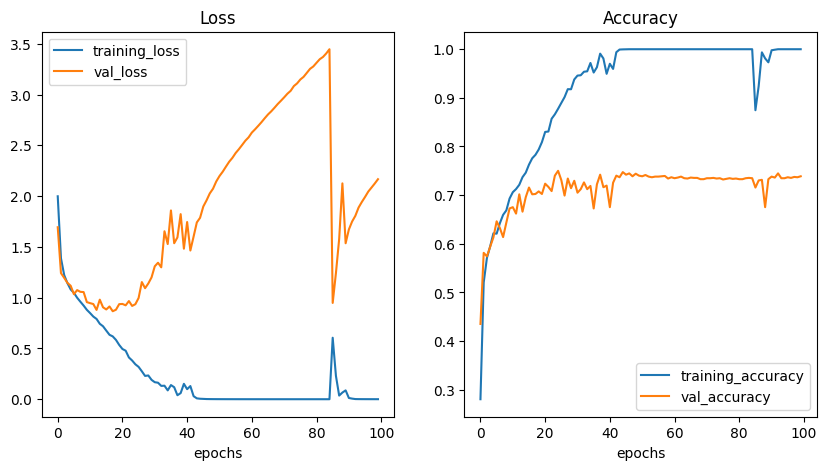

In [15]:
plot_loss_curves(history_1)